In [13]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import datetime
import matplotlib.dates as mdates
import scipy.signal as signal

%matplotlib inline


In [5]:
dir60='/media/extra/DATA/IBI/IBI60-CJM165-S/'
dir12='/media/extra/DATA/IBI/IBI12.L75-MAA13-S/'

UKfiles60='ptUK-IBI60-CJM165_y????m??d??.1h_gridT.nc'
UKtfiles60=dir60+UKfiles60
UKds60 = xr.open_mfdataset(UKtfiles60,concat_dim='time_counter')

UKfiles12='ptUK-IBI12.L75-MAA13_y????m??d??.1h_SSH.nc'
UKtfiles12=dir12+UKfiles12
UKds12 = xr.open_mfdataset(UKtfiles12,concat_dim='time_counter')

IRLfiles60='ptIRL-IBI60-CJM165_y????m??d??.1h_gridT.nc'
IRLtfiles60=dir60+IRLfiles60
IRLds60 = xr.open_mfdataset(IRLtfiles60,concat_dim='time_counter')

IRLfiles12='ptIRL-IBI12.L75-MAA13_y????m??d??.1h_SSH.nc'
IRLtfiles12=dir12+IRLfiles12
IRLds12 = xr.open_mfdataset(IRLtfiles12,concat_dim='time_counter')

NORfiles60='ptNOR-IBI60-CJM165_y????m??d??.1h_gridT.nc'
NORtfiles60=dir60+NORfiles60
NORds60 = xr.open_mfdataset(NORtfiles60,concat_dim='time_counter')

NORfiles12='ptNOR-IBI12.L75-MAA13_y????m??d??.1h_SSH.nc'
NORtfiles12=dir12+NORfiles12
NORds12 = xr.open_mfdataset(NORtfiles12,concat_dim='time_counter')

MEDfiles60='ptMED-IBI60-CJM165_y????m??d??.1h_gridT.nc'
MEDtfiles60=dir60+MEDfiles60
MEDds60 = xr.open_mfdataset(MEDtfiles60,concat_dim='time_counter')

MEDfiles12='ptMED-IBI12.L75-MAA13_y????m??d??.1h_SSH.nc'
MEDtfiles12=dir12+MEDfiles12
MEDds12 = xr.open_mfdataset(MEDtfiles12,concat_dim='time_counter')


# Series temporelles

In [6]:
ssh12UK=np.squeeze(UKds12.sossheig)
ssh12NOR=np.squeeze(NORds12.sossheig)
ssh12IRL=np.squeeze(IRLds12.sossheig)
ssh12MED=np.squeeze(MEDds12.sossheig)

ssh60UK=np.squeeze(UKds60.sossheig)
ssh60NOR=np.squeeze(NORds60.sossheig)
ssh60IRL=np.squeeze(IRLds60.sossheig)
ssh60MED=np.squeeze(MEDds60.sossheig)


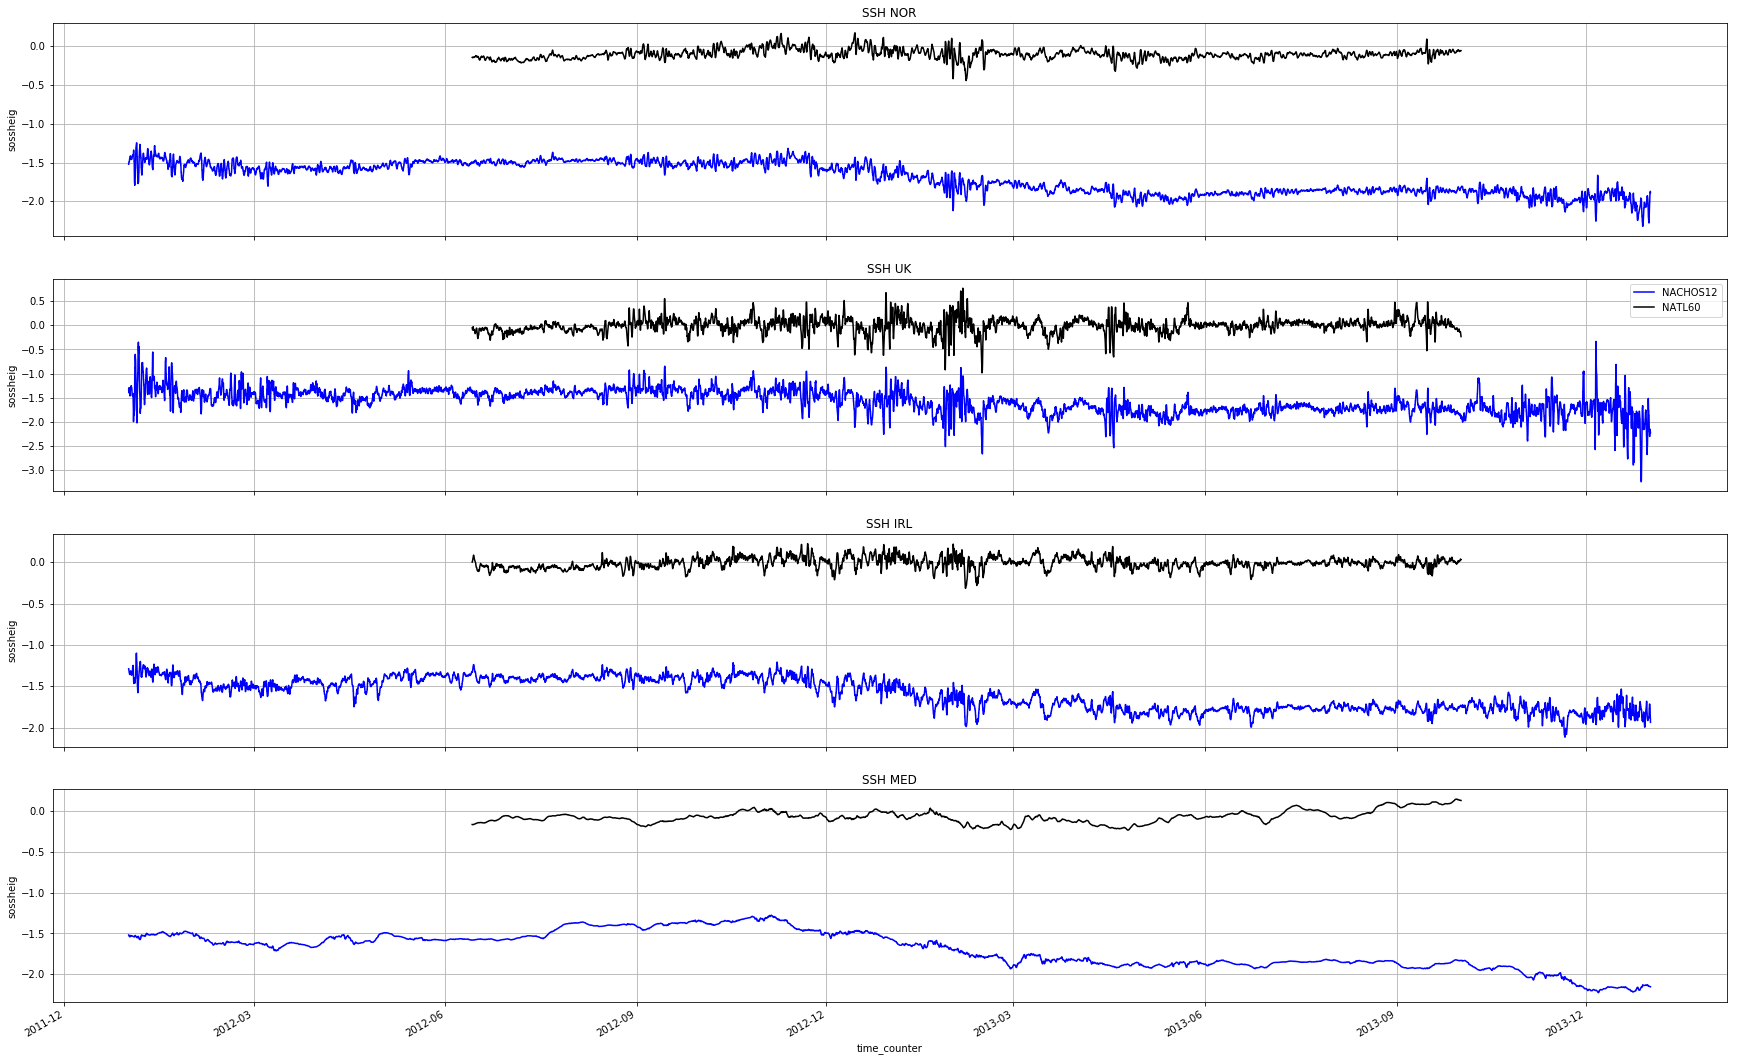

In [7]:
fig=plt.figure(figsize=(30,20))

ax = fig.add_subplot(412)
ssh12UK.plot.line('b',label="NACHOS12")
ssh60UK.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH UK')
plt.grid(True)

ax = fig.add_subplot(411)
ssh12NOR.plot.line('b',label="NACHOS12")
ssh60NOR.plot.line('k',label="NATL60")
plt.title('SSH NOR')
plt.grid(True)

ax = fig.add_subplot(413)
ssh12IRL.plot.line('b',label="NACHOS12")
ssh60IRL.plot.line('k',label="NATL60")
plt.title('SSH IRL')
plt.grid(True)

ax = fig.add_subplot(414)
ssh12MED.plot.line('b',label="NACHOS12")
ssh60MED.plot.line('k',label="NATL60")
plt.title('SSH MED')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NATL60-NACHOS12-SSH-NOR-UK-IRL-MED-2012-2013.png')

## décembre 2012-février 2013, sans la moyenne

In [8]:
ssh12UK3mois=ssh12UK.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh12NOR3mois=ssh12NOR.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh12IRL3mois=ssh12IRL.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh12MED3mois=ssh12MED.sel(time_counter=slice('2012-12-01','2013-02-28'))

ssh60UK3mois=ssh60UK.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh60NOR3mois=ssh60NOR.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh60IRL3mois=ssh60IRL.sel(time_counter=slice('2012-12-01','2013-02-28'))
ssh60MED3mois=ssh60MED.sel(time_counter=slice('2012-12-01','2013-02-28'))


In [9]:
dssh12UK3mois=ssh12UK3mois-np.mean(ssh12UK3mois)
dssh12NOR3mois=ssh12NOR3mois-np.mean(ssh12NOR3mois)
dssh12IRL3mois=ssh12IRL3mois-np.mean(ssh12IRL3mois)
dssh12MED3mois=ssh12MED3mois-np.mean(ssh12MED3mois)

dssh60UK3mois=ssh60UK3mois-np.mean(ssh60UK3mois)
dssh60NOR3mois=ssh60NOR3mois-np.mean(ssh60NOR3mois)
dssh60IRL3mois=ssh60IRL3mois-np.mean(ssh60IRL3mois)
dssh60MED3mois=ssh60MED3mois-np.mean(ssh60MED3mois)


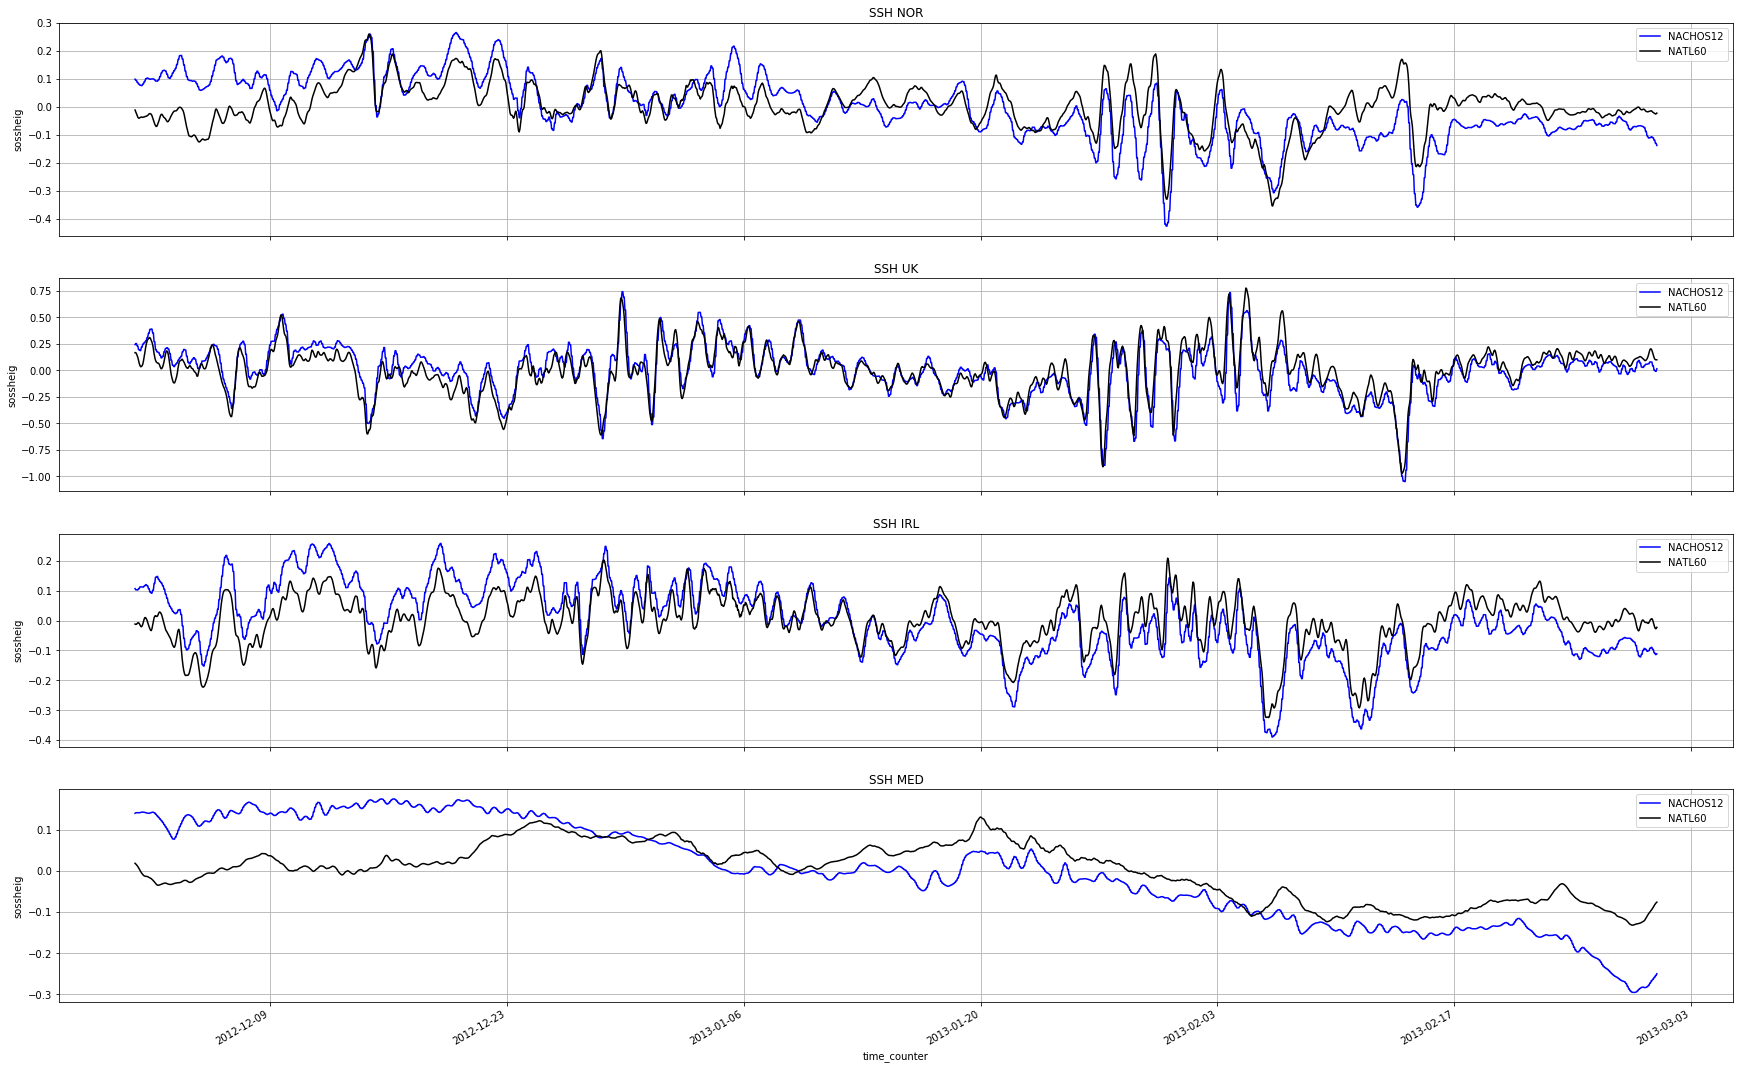

In [10]:
fig=plt.figure(figsize=(30,20))

ax = fig.add_subplot(412)
dssh12UK3mois.plot.line('b',label="NACHOS12")
dssh60UK3mois.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH UK')
plt.grid(True)

ax = fig.add_subplot(411)
dssh12NOR3mois.plot.line('b',label="NACHOS12")
dssh60NOR3mois.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH NOR')
plt.grid(True)

ax = fig.add_subplot(413)
dssh12IRL3mois.plot.line('b',label="NACHOS12")
dssh60IRL3mois.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH IRL')
plt.grid(True)

ax = fig.add_subplot(414)
dssh12MED3mois.plot.line('b',label="NACHOS12")
dssh60MED3mois.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH MED')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NATL60-NACHOS12-SSH-NOR-UK-IRL-MED-01122012-28022013.png')


## 20 janvier - 3 février, sans la moyenne

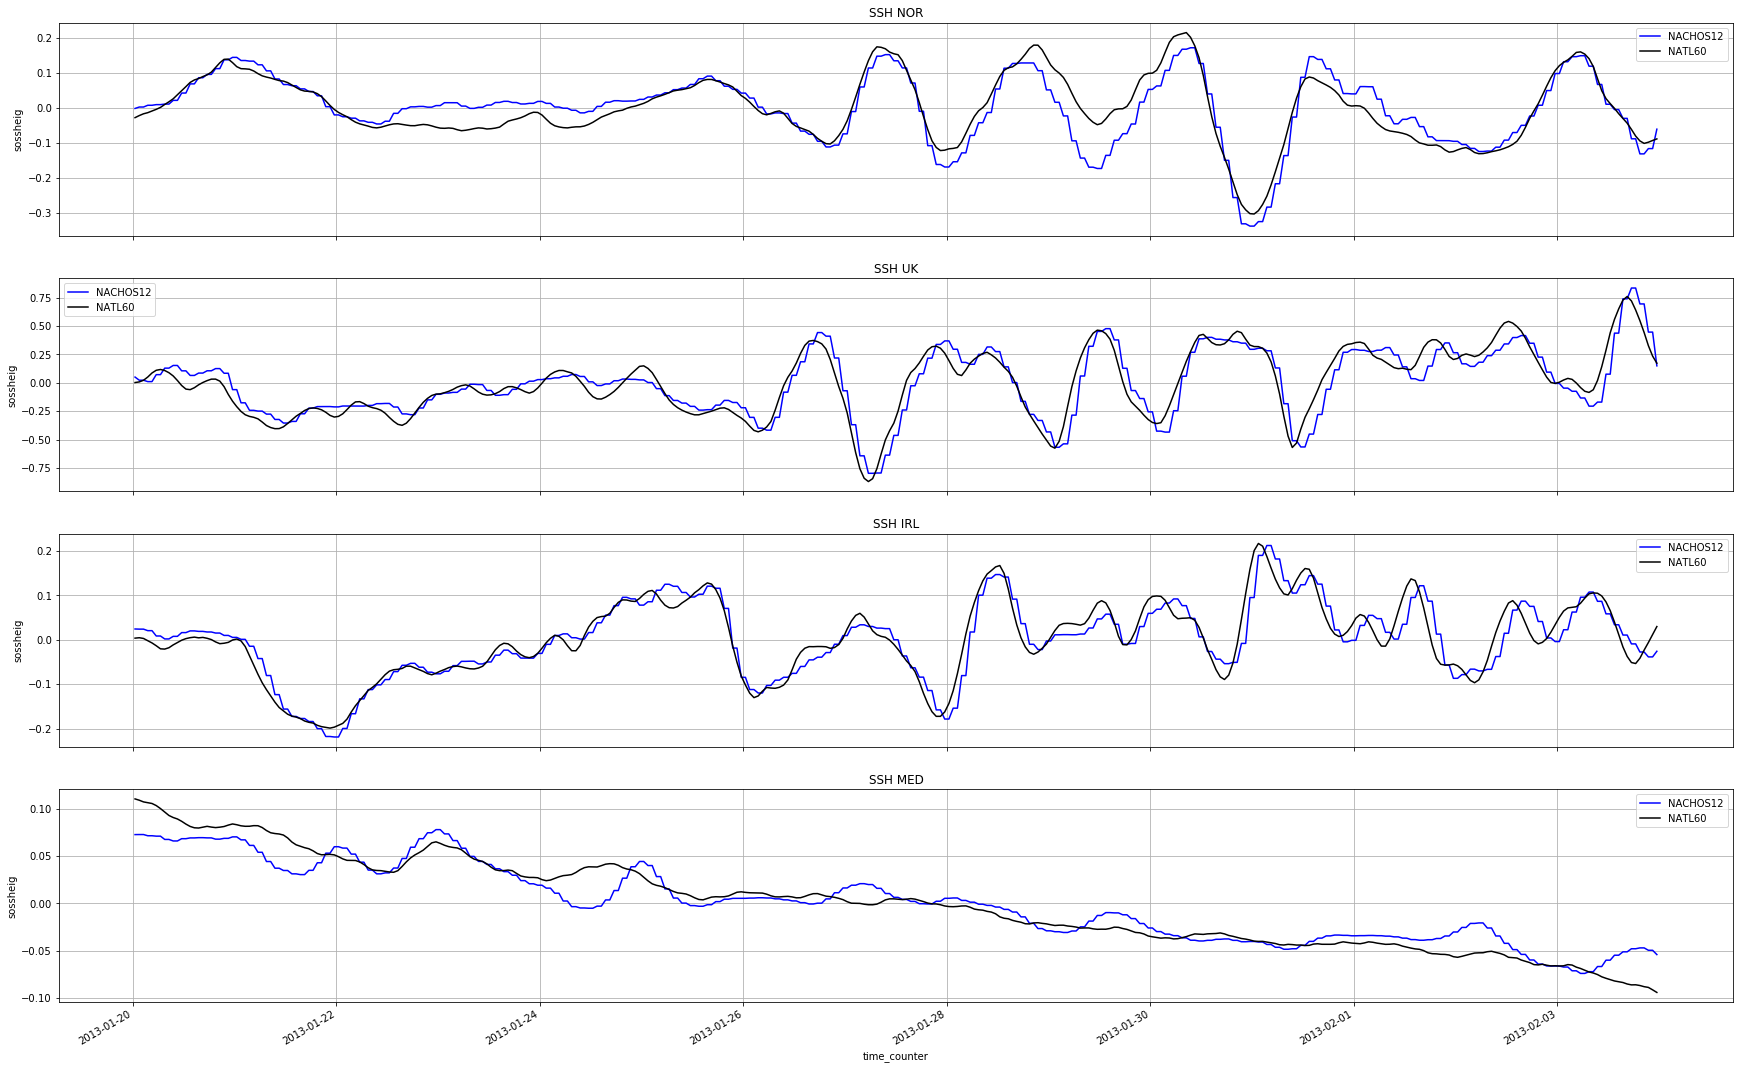

In [19]:
ssh12UK1sem=ssh12UK.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh12NOR1sem=ssh12NOR.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh12IRL1sem=ssh12IRL.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh12MED1sem=ssh12MED.sel(time_counter=slice('2013-01-20','2013-02-03'))

ssh60UK1sem=ssh60UK.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh60NOR1sem=ssh60NOR.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh60IRL1sem=ssh60IRL.sel(time_counter=slice('2013-01-20','2013-02-03'))
ssh60MED1sem=ssh60MED.sel(time_counter=slice('2013-01-20','2013-02-03'))

dssh12UK1sem=ssh12UK1sem-np.mean(ssh12UK1sem)
dssh12NOR1sem=ssh12NOR1sem-np.mean(ssh12NOR1sem)
dssh12IRL1sem=ssh12IRL1sem-np.mean(ssh12IRL1sem)
dssh12MED1sem=ssh12MED1sem-np.mean(ssh12MED1sem)

dssh60UK1sem=ssh60UK1sem-np.mean(ssh60UK1sem)
dssh60NOR1sem=ssh60NOR1sem-np.mean(ssh60NOR1sem)
dssh60IRL1sem=ssh60IRL1sem-np.mean(ssh60IRL1sem)
dssh60MED1sem=ssh60MED1sem-np.mean(ssh60MED1sem)

fig=plt.figure(figsize=(30,20))

ax = fig.add_subplot(412)
dssh12UK1sem.plot.line('b',label="NACHOS12")
dssh60UK1sem.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH UK')
plt.grid(True)

ax = fig.add_subplot(411)
dssh12NOR1sem.plot.line('b',label="NACHOS12")
dssh60NOR1sem.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH NOR')
plt.grid(True)

ax = fig.add_subplot(413)
dssh12IRL1sem.plot.line('b',label="NACHOS12")
dssh60IRL1sem.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH IRL')
plt.grid(True)

ax = fig.add_subplot(414)
dssh12MED1sem.plot.line('b',label="NACHOS12")
dssh60MED1sem.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH MED')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NATL60-NACHOS12-SSH-NOR-UK-IRL-MED-20012013-03022013.png')


## 20-21 janvier, sans la moyenne

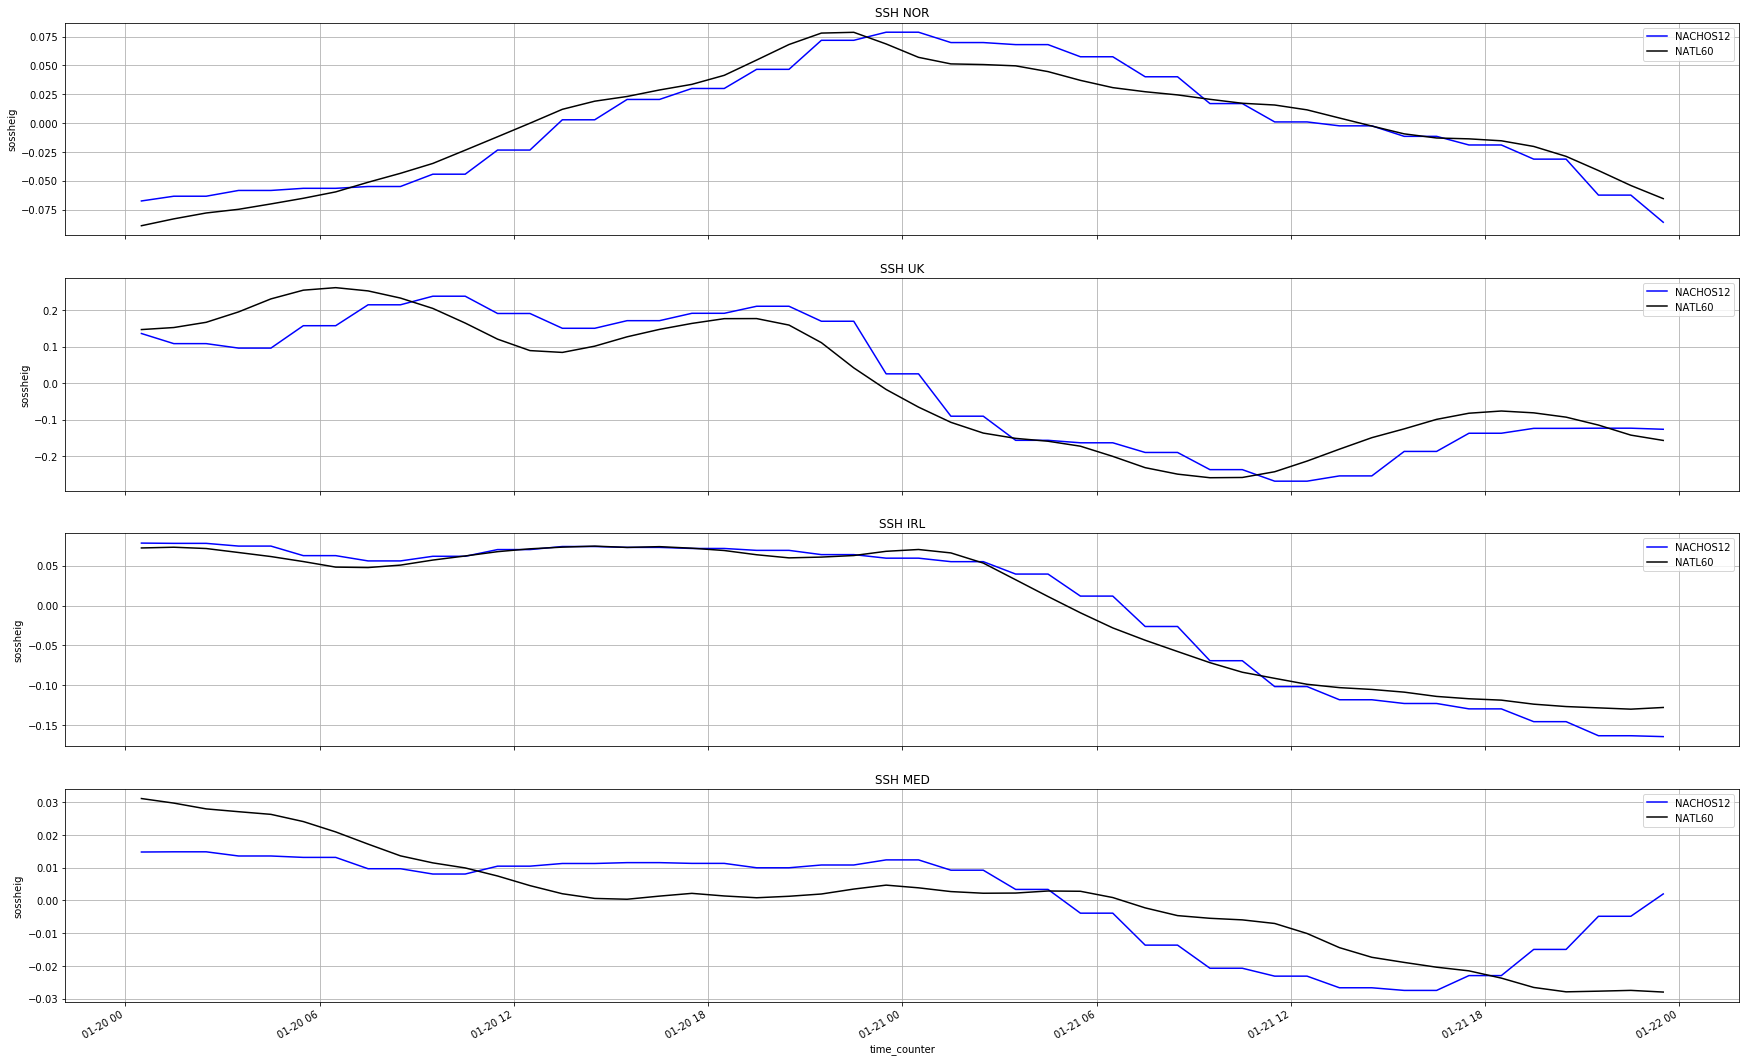

In [18]:
ssh12UK2day=ssh12UK.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh12NOR2day=ssh12NOR.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh12IRL2day=ssh12IRL.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh12MED2day=ssh12MED.sel(time_counter=slice('2013-01-20','2013-01-21'))

ssh60UK2day=ssh60UK.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh60NOR2day=ssh60NOR.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh60IRL2day=ssh60IRL.sel(time_counter=slice('2013-01-20','2013-01-21'))
ssh60MED2day=ssh60MED.sel(time_counter=slice('2013-01-20','2013-01-21'))

dssh12UK2day=ssh12UK2day-np.mean(ssh12UK2day)
dssh12NOR2day=ssh12NOR2day-np.mean(ssh12NOR2day)
dssh12IRL2day=ssh12IRL2day-np.mean(ssh12IRL2day)
dssh12MED2day=ssh12MED2day-np.mean(ssh12MED2day)

dssh60UK2day=ssh60UK2day-np.mean(ssh60UK2day)
dssh60NOR2day=ssh60NOR2day-np.mean(ssh60NOR2day)
dssh60IRL2day=ssh60IRL2day-np.mean(ssh60IRL2day)
dssh60MED2day=ssh60MED2day-np.mean(ssh60MED2day)

fig=plt.figure(figsize=(30,20))

ax = fig.add_subplot(412)
dssh12UK2day.plot.line('b',label="NACHOS12")
dssh60UK2day.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH UK')
plt.grid(True)

ax = fig.add_subplot(411)
dssh12NOR2day.plot.line('b',label="NACHOS12")
dssh60NOR2day.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH NOR')
plt.grid(True)

ax = fig.add_subplot(413)
dssh12IRL2day.plot.line('b',label="NACHOS12")
dssh60IRL2day.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH IRL')
plt.grid(True)

ax = fig.add_subplot(414)
dssh12MED2day.plot.line('b',label="NACHOS12")
dssh60MED2day.plot.line('k',label="NATL60")
plt.legend()
plt.title('SSH MED')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NATL60-NACHOS12-SSH-NOR-UK-IRL-MED-20012013-21012013.png')
